In [78]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
import  matplotlib.pyplot as plt

In [79]:
df = pd.read_csv(r"C:\Users\phunk\Desktop\MyProject\dataanalyst\Superstore Sales Dataset\Data\Superstore Sales Dataset.csv")

In [80]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [81]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [83]:
for col in df.columns:
    print(f"{col} : {len(df[col].unique())}")

Row ID : 9800
Order ID : 4922
Order Date : 1230
Ship Date : 1326
Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 529
State : 49
Postal Code : 627
Region : 4
Product ID : 1861
Category : 3
Sub-Category : 17
Product Name : 1849
Sales : 5757


In [84]:
encode = OrdinalEncoder()
df["Postal Code"] = encode.fit_transform(df[["Postal Code"]])

df["Postal Code"]

0       215.0
1       215.0
2       513.0
3       168.0
4       168.0
        ...  
9795    343.0
9796    223.0
9797    223.0
9798    223.0
9799    223.0
Name: Postal Code, Length: 9800, dtype: float64

In [85]:
imputer = KNNImputer(n_neighbors=5)
df["Postal Code"] = imputer.fit_transform(df[["Postal Code"]])
df["Postal Code"] = df["Postal Code"].round().astype(int)

In [86]:
df["Postal Code"] = encode.inverse_transform(df[["Postal Code"]]).astype(int)

In [87]:
df["Postal Code"]

0       42420
1       42420
2       90036
3       33311
4       33311
        ...  
9795    60610
9796    43615
9797    43615
9798    43615
9799    43615
Name: Postal Code, Length: 9800, dtype: int64

In [88]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

<Axes: xlabel='State'>

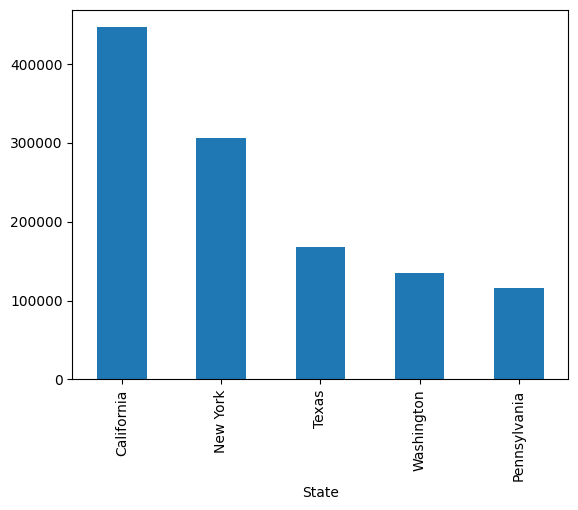

In [89]:
sale_by_stage = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(5)
sale_by_stage.plot(kind="bar")

<Axes: xlabel='Postal Code'>

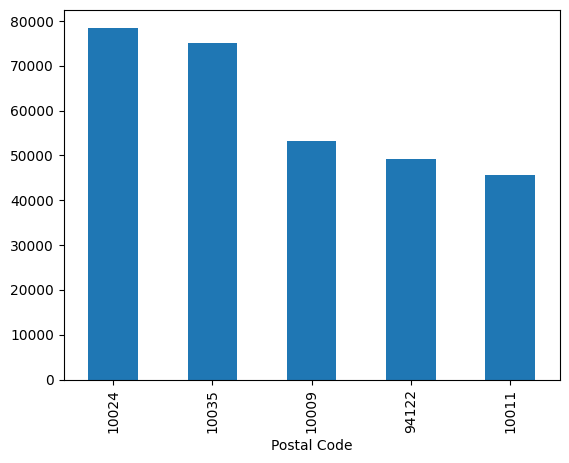

In [90]:
sale_by_code = df.groupby("Postal Code")["Sales"].sum().sort_values(ascending=False).head(5)
sale_by_code.plot(kind="bar")

<Axes: xlabel='Region'>

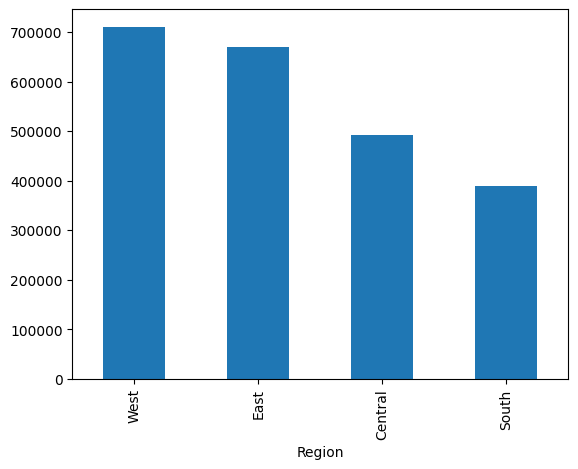

In [91]:
sale_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
sale_by_region.plot(kind="bar")

<Axes: xlabel='Segment'>

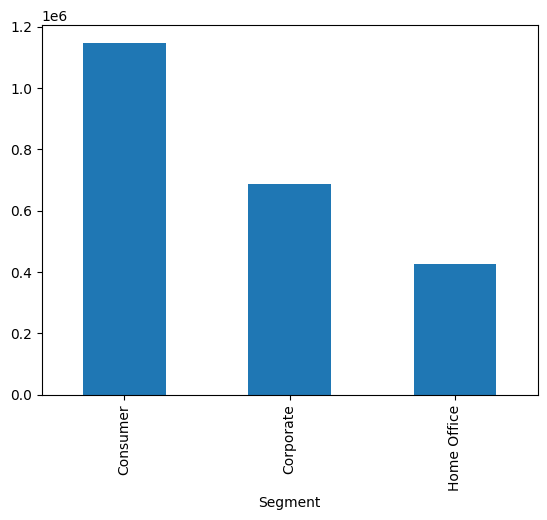

In [96]:
sale_by_seg = df.groupby("Segment")["Sales"].sum().sort_values(ascending=False)
sale_by_seg.plot(kind="bar")

<Axes: xlabel='Category'>

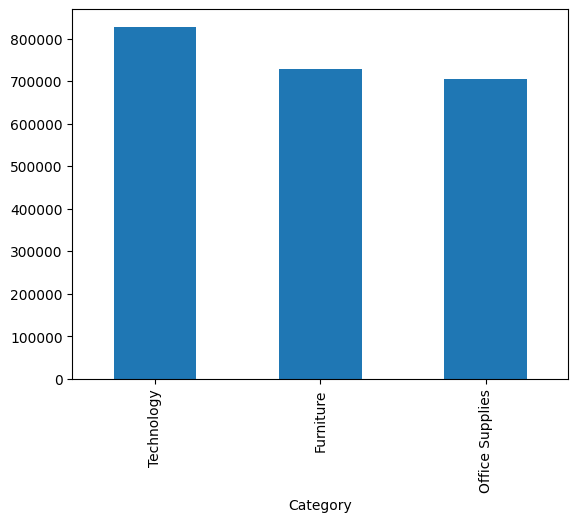

In [92]:
sale_by_cat = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
sale_by_cat.plot(kind="bar")

<Axes: xlabel='Product Name'>

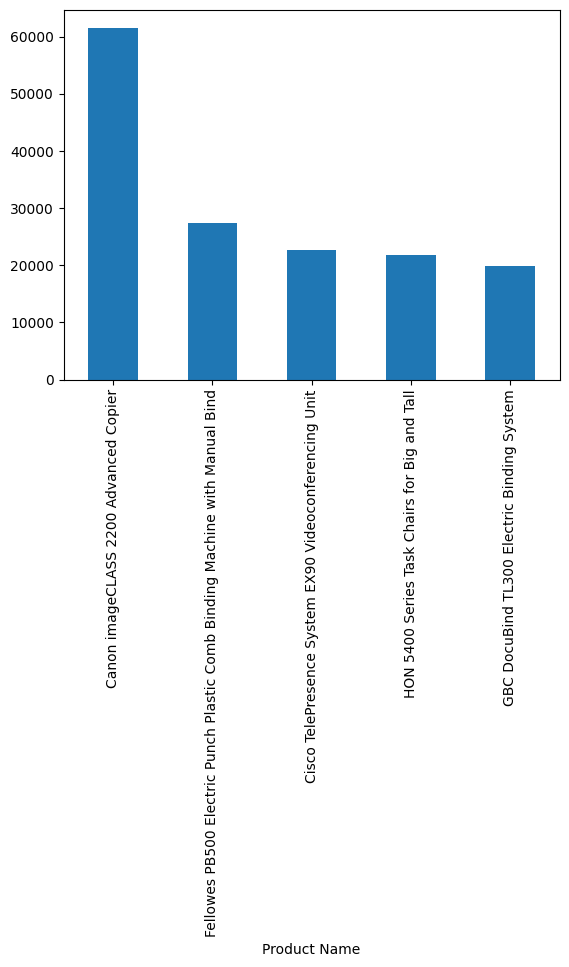

In [93]:
sale_by_name = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(5)
sale_by_name.plot(kind="bar")

<Axes: xlabel='Customer Name'>

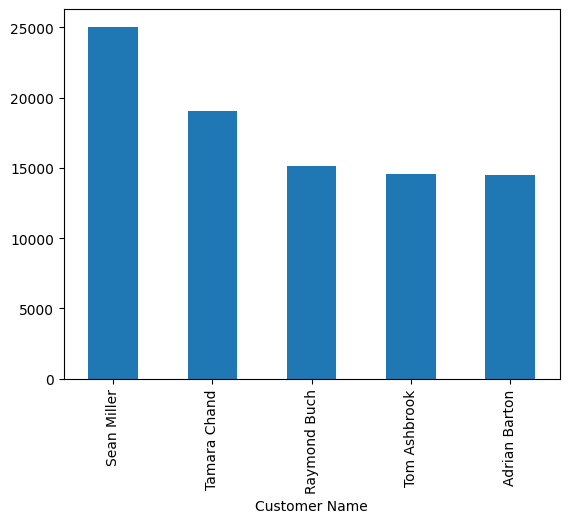

In [94]:
sale_by_customer = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(5)
sale_by_customer.plot(kind="bar")